In [64]:
# import required modules for this project

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

**Datasets Overview**

In [65]:
# Load csv files
attendance = pd.read_csv('/Users/sa26/Documents/GitHub/Predict-Podcast-Listening-Time/Education-Capstone/data/2016-17_-_2020-23_Citywide_End-of-Year_Attendance_and_Chronic_Absenteeism_Data_20250604.csv')

In [66]:
demographics = pd.read_csv('/Users/sa26/Documents/GitHub/Predict-Podcast-Listening-Time/Education-Capstone/data/2019-20_Demographic_Snapshot_-_Citywide_20250604.csv')

In [67]:
graduation = pd.read_csv('/Users/sa26/Documents/GitHub/Predict-Podcast-Listening-Time/Education-Capstone/data/Graduation_results_for_Cohorts_2012_to_2019__Classes_of_2016_to_2023__20250609.csv')

**Attendance**

In [68]:
# print out the first 5 rows of data
attendance.head()

,Grade,Category,Year,# Total Days,# Days Absent,# Days Present,% Attendance,# Contributing 10+ Total Days and 1+ Pres Day,# Chronically Absent,% Chronically Absent
0,All Grades,All Students,2018-19,30887,2278,28609,92.6,192,47,24.5
1,All Grades,All Students,2019-20,21101,1500,19601,92.9,204,58,28.4
2,All Grades,All Students,2020-21,32686,3931,28755,88.0,199,84,42.2
3,All Grades,All Students,2021-22,31663,4751,26912,85.0,190,113,59.5
4,All Grades,All Students,2022-23,32663,4159,28504,87.3,206,104,50.5


Opened attendance in data wrangler. 53,607 rows x 10 columns. 305 duplicate rows to investigate later. In the grade category, most of the data is 'All Grades'. Will probably delete Category column since it is redundant. Years are spread mostly equally through 2018 to 2023. Might want to double check % Attendance calculation. # Contributing 10+ Total Days and 1+ Pres Day means students must be enrolled for at least 10 days (regardless of whether present or absent) and must have been present for at least 1 day. Students are considered chronically absent if they have an attendance of <=90%. Might need to check out data types.

In [69]:
# Print out general information on this dataframe
attendance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53607 entries, 0 to 53606
Data columns (total 10 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Grade                                          53607 non-null  object
 1   Category                                       53607 non-null  object
 2   Year                                           53607 non-null  object
 3   # Total Days                                   53607 non-null  int64 
 4   # Days Absent                                  53607 non-null  object
 5   # Days Present                                 53607 non-null  object
 6   % Attendance                                   53607 non-null  object
 7   # Contributing 10+ Total Days and 1+ Pres Day  53607 non-null  object
 8   # Chronically Absent                           53607 non-null  object
 9   % Chronically Absent                           53607 non-null

Will switch most of these to int64 eventually. Quote from dataset information: "In order to comply with the Family Educational Rights and Privacy Act (FERPA) regulations on public reporting of education outcomes, rows with five or fewer students are suppressed, and have been replaced with an "s". Using total days of attendance as a proxy , rows with 900 or fewer total days are suppressed. In addition, other rows have been replaced with an "s" when they could reveal, through addition or subtraction, the underlying numbers that have been redacted. Chronic absenteeism values are suppressed, regardless of total days, if the number of students who contribute  at least 20 days is five or fewer."

In [70]:
attendance.describe()

,# Total Days
count,5.360700e+04
mean,2.654513e+04
std,4.314677e+04
min,1.000000e+00
25%,8.036000e+03
50%,1.332000e+04
75%,2.304100e+04
max,1.024625e+06


Total number of days equals days present and absent. Will need to double check these calculations.

In [71]:
attendance.isnull().sum()

Grade                                            0
Category                                         0
Year                                             0
# Total Days                                     0
# Days Absent                                    0
# Days Present                                   0
% Attendance                                     0
# Contributing 10+ Total Days and 1+ Pres Day    0
# Chronically Absent                             0
% Chronically Absent                             0
dtype: int64

Text(0.5, 1.0, 'Distribution of # Total Days')

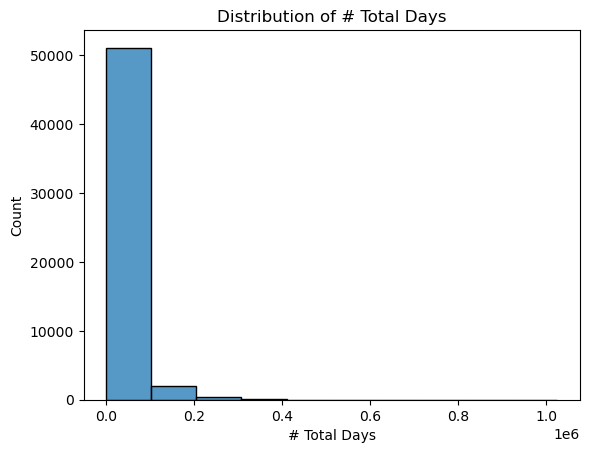

In [72]:
# Distribution of # Total Days
sns.histplot(attendance['# Total Days'], bins=10, kde=False)
plt.title('Distribution of # Total Days')

Right-skewed

In [73]:
# Dropped Category column
attendance.drop('Category', axis=1, inplace=True)
attendance

,Grade,Year,# Total Days,# Days Absent,# Days Present,% Attendance,# Contributing 10+ Total Days and 1+ Pres Day,# Chronically Absent,% Chronically Absent
0,All Grades,2018-19,30887,2278,28609,92.6,192,47,24.5
1,All Grades,2019-20,21101,1500,19601,92.9,204,58,28.4
2,All Grades,2020-21,32686,3931,28755,88.0,199,84,42.2
3,All Grades,2021-22,31663,4751,26912,85.0,190,113,59.5
4,All Grades,2022-23,32663,4159,28504,87.3,206,104,50.5
...,...,...,...,...,...,...,...,...,...
53602,12,2018-19,62398,10686,51712,82.9,363,200,55.1
53603,12,2019-20,39800,6585,33215,83.5,352,194,55.1
53604,12,2020-21,68770,15327,53443,77.7,398,224,56.3
53605,12,2021-22,60634,16098,44536,73.5,355,263,74.1


In [74]:
# Create a boolean DataFrame indicating where 's' is present in any cell for attendance dataset
# The .any(axis=1) checks if 's' is present in at least one column for each row
rows_with_s_across_columns = attendance.isin(['s']).any(axis=1)

# Filter the DataFrame to get only those rows
filtered_attendance = attendance[rows_with_s_across_columns]

# Count the number of such rows
count_s_across_columns = len(filtered_attendance)

print(f"Number of rows with 's' in any column: {count_s_across_columns}")
print("\nFiltered Rows:")
print(filtered_attendance)

Number of rows with 's' in any column: 1789

Filtered Rows:
                    Grade     Year  # Total Days # Days Absent # Days Present  \
334    PK in K-12 Schools  2020-21          2204             s              s   
335    PK in K-12 Schools  2021-22          2785             s              s   
341                    0K  2022-23          2715             s              s   
382                     9  2020-21            90             s              s   
383                     9  2021-22            94             s              s   
...                   ...      ...           ...           ...            ...   
53585                   8  2019-20           345             s              s   
53586                   8  2020-21            13             s              s   
53589                   9  2020-21         12489             s              s   
53593                  10  2019-20          9799             s              s   
53595                  10  2021-22         12894 

In [75]:
# Dropped suppressed data

rows_to_drop = attendance.isin(['s']).any(axis=1)
attendance = attendance[~rows_to_drop]
attendance

,Grade,Year,# Total Days,# Days Absent,# Days Present,% Attendance,# Contributing 10+ Total Days and 1+ Pres Day,# Chronically Absent,% Chronically Absent
0,All Grades,2018-19,30887,2278,28609,92.6,192,47,24.5
1,All Grades,2019-20,21101,1500,19601,92.9,204,58,28.4
2,All Grades,2020-21,32686,3931,28755,88.0,199,84,42.2
3,All Grades,2021-22,31663,4751,26912,85.0,190,113,59.5
4,All Grades,2022-23,32663,4159,28504,87.3,206,104,50.5
...,...,...,...,...,...,...,...,...,...
53602,12,2018-19,62398,10686,51712,82.9,363,200,55.1
53603,12,2019-20,39800,6585,33215,83.5,352,194,55.1
53604,12,2020-21,68770,15327,53443,77.7,398,224,56.3
53605,12,2021-22,60634,16098,44536,73.5,355,263,74.1


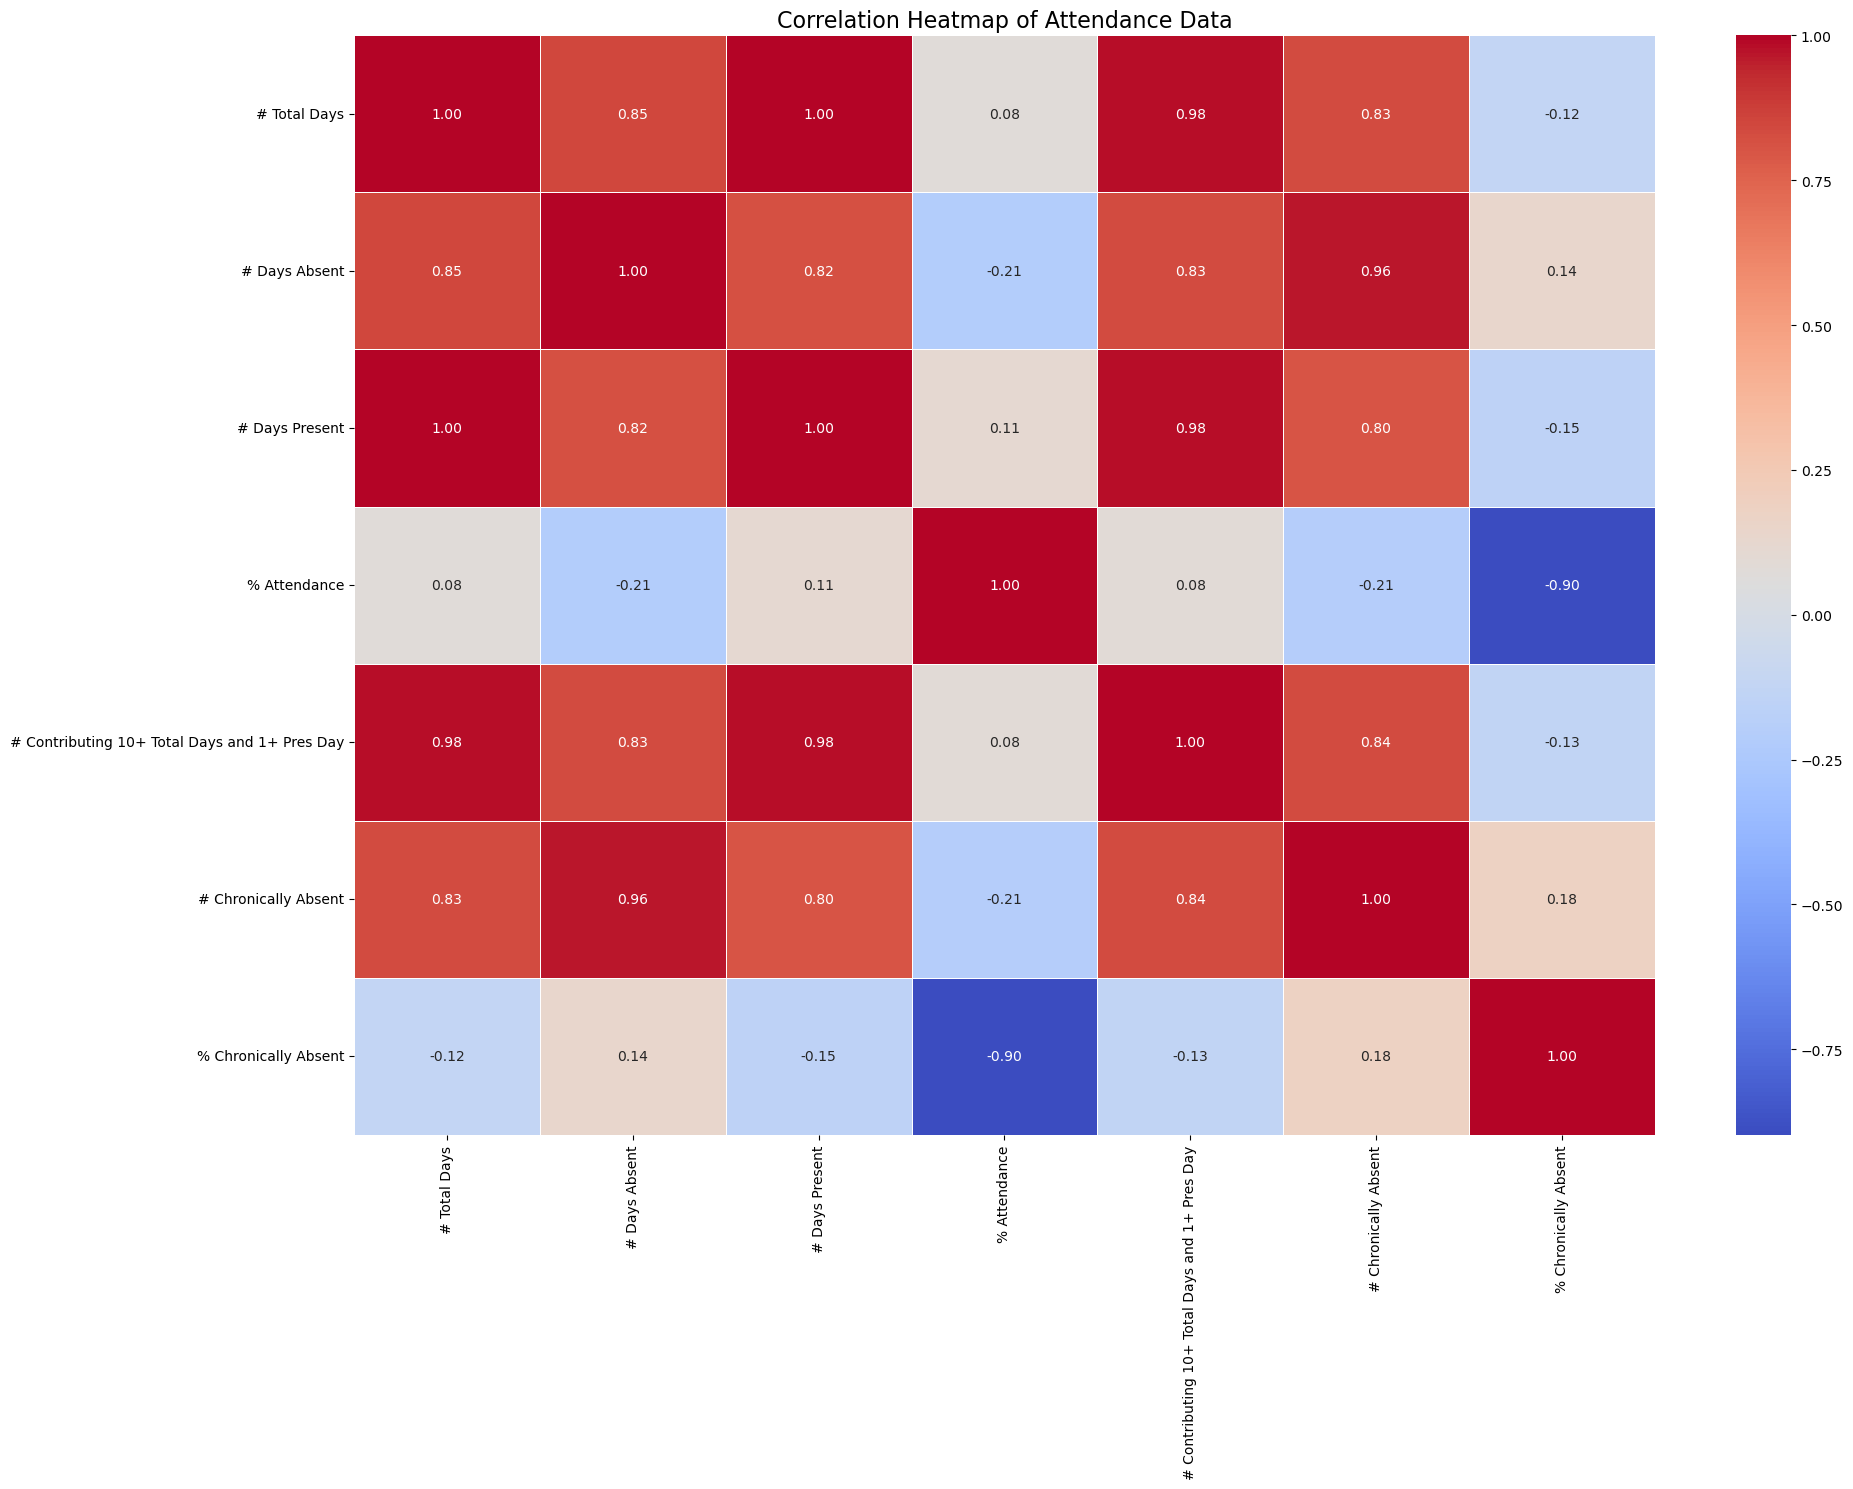

In [76]:
attendance_number = attendance.drop(columns=['Grade', 'Year'])
# Calculate the Correlation Matrix
correlation_attendance = attendance_number.corr()
# Generate the Heatmap
# Set up the matplotlib figure to control the size of the plot.
plt.figure(figsize=(20, 15))
# Create the heatmap using seaborn.
sns.heatmap(correlation_attendance, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
# Add a title to the plot for clarity.
plt.title('Correlation Heatmap of Attendance Data', fontsize=16)
# Ensure the plot layout is tight.
plt.tight_layout()
# Display the plot.
plt.show()

Many features correlated. Will evaluate the importance of all them

**Demographics**

In [77]:
demographics.head()

,Year,Total Enrollment,Grade 3K+PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,...,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index
0,2015-16,1133963,71847,84386,87804,86930,85309,81287,79581,76798,...,0.021,167465,0.148,222496,0.196,142506,0.126,801696,0.707,0.621
1,2016-17,1141232,72553,82517,86008,86279,85050,84185,80563,78985,...,0.023,169803,0.149,228347,0.200,153466,0.134,800985,0.702,0.610
2,2017-18,1135334,71528,81588,83578,83978,84363,83367,83277,79114,...,0.025,170417,0.150,231910,0.204,153661,0.135,856483,0.754,0.719
3,2018-19,1126501,73904,78627,81908,81205,81706,82510,82044,81289,...,0.027,169583,0.151,234497,0.208,148815,0.132,834003,0.740,0.713
4,2019-20,1131868,87480,78587,79171,80298,79555,80287,81513,80250,...,0.031,170370,0.151,230983,0.204,142386,0.126,821883,0.726,0.719


Opened demographics in data wrangler. Need to confirm what this column means: Grade 3K+PK (Half Day & Full Day). See if grades and more columns total enrollment. Male and Hispanic student enrollment appears to be higher. Overall 1 in 5 students have disabilities. Over 10% are learning English. About 3 in 4 students are in poverty and over 60% demonstrate economic need. Need to look up the difference between these two columns. 

In [78]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 37 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Year                                        5 non-null      object 
 1   Total Enrollment                            5 non-null      int64  
 2   Grade 3K+PK (Half Day & Full Day)           5 non-null      int64  
 3   Grade K                                     5 non-null      int64  
 4   Grade 1                                     5 non-null      int64  
 5   Grade 2                                     5 non-null      int64  
 6   Grade 3                                     5 non-null      int64  
 7   Grade 4                                     5 non-null      int64  
 8   Grade 5                                     5 non-null      int64  
 9   Grade 6                                     5 non-null      int64  
 10  Grade 7           

Many features. Maybe can reduce later on

In [79]:
demographics.describe()

,Total Enrollment,Grade 3K+PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,...,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index
count,5.000000e+00,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,1.133780e+06,75462.400000,81141.000000,83693.800000,83738.000000,83196.600000,82327.200000,81395.60000,79287.200000,77958.800000,...,0.025400,169527.600000,0.149800,229646.600000,0.202400,148166.800000,0.130600,823010.000000,0.725800,0.676400
std,5.353043e+03,6779.870006,2523.208374,3387.752825,2956.046092,2487.013932,1566.082118,1410.66183,1677.172233,1836.713832,...,0.003847,1207.673714,0.001304,4562.218901,0.004561,5571.135943,0.004336,23355.647754,0.021891,0.055784
min,1.126501e+06,71528.000000,78587.000000,79171.000000,80298.000000,79555.000000,80287.000000,79581.00000,76798.000000,75802.000000,...,0.021000,167465.000000,0.148000,222496.000000,0.196000,142386.000000,0.126000,800985.000000,0.702000,0.610000
25%,1.131868e+06,71847.000000,78627.000000,81908.000000,81205.000000,81706.000000,81287.000000,80563.00000,78985.000000,76778.000000,...,0.023000,169583.000000,0.149000,228347.000000,0.200000,142506.000000,0.126000,801696.000000,0.707000,0.621000
50%,1.133963e+06,72553.000000,81588.000000,83578.000000,83978.000000,84363.000000,82510.000000,81513.00000,79114.000000,78125.000000,...,0.025000,169803.000000,0.150000,230983.000000,0.204000,148815.000000,0.132000,821883.000000,0.726000,0.713000
75%,1.135334e+06,73904.000000,82517.000000,86008.000000,86279.000000,85050.000000,83367.000000,82044.00000,80250.000000,78451.000000,...,0.027000,170370.000000,0.151000,231910.000000,0.204000,153466.000000,0.134000,834003.000000,0.740000,0.719000
max,1.141232e+06,87480.000000,84386.000000,87804.000000,86930.000000,85309.000000,84185.000000,83277.00000,81289.000000,80638.000000,...,0.031000,170417.000000,0.151000,234497.000000,0.208000,153661.000000,0.135000,856483.000000,0.754000,0.719000


In [80]:
demographics.isnull().sum()

Year                                          0
Total Enrollment                              0
Grade 3K+PK (Half Day & Full Day)             0
Grade K                                       0
Grade 1                                       0
Grade 2                                       0
Grade 3                                       0
Grade 4                                       0
Grade 5                                       0
Grade 6                                       0
Grade 7                                       0
Grade 8                                       0
Grade 9                                       0
Grade 10                                      0
Grade 11                                      0
Grade 12                                      0
# Female                                      0
% Female                                      0
# Male                                        0
% Male                                        0
# Asian                                 

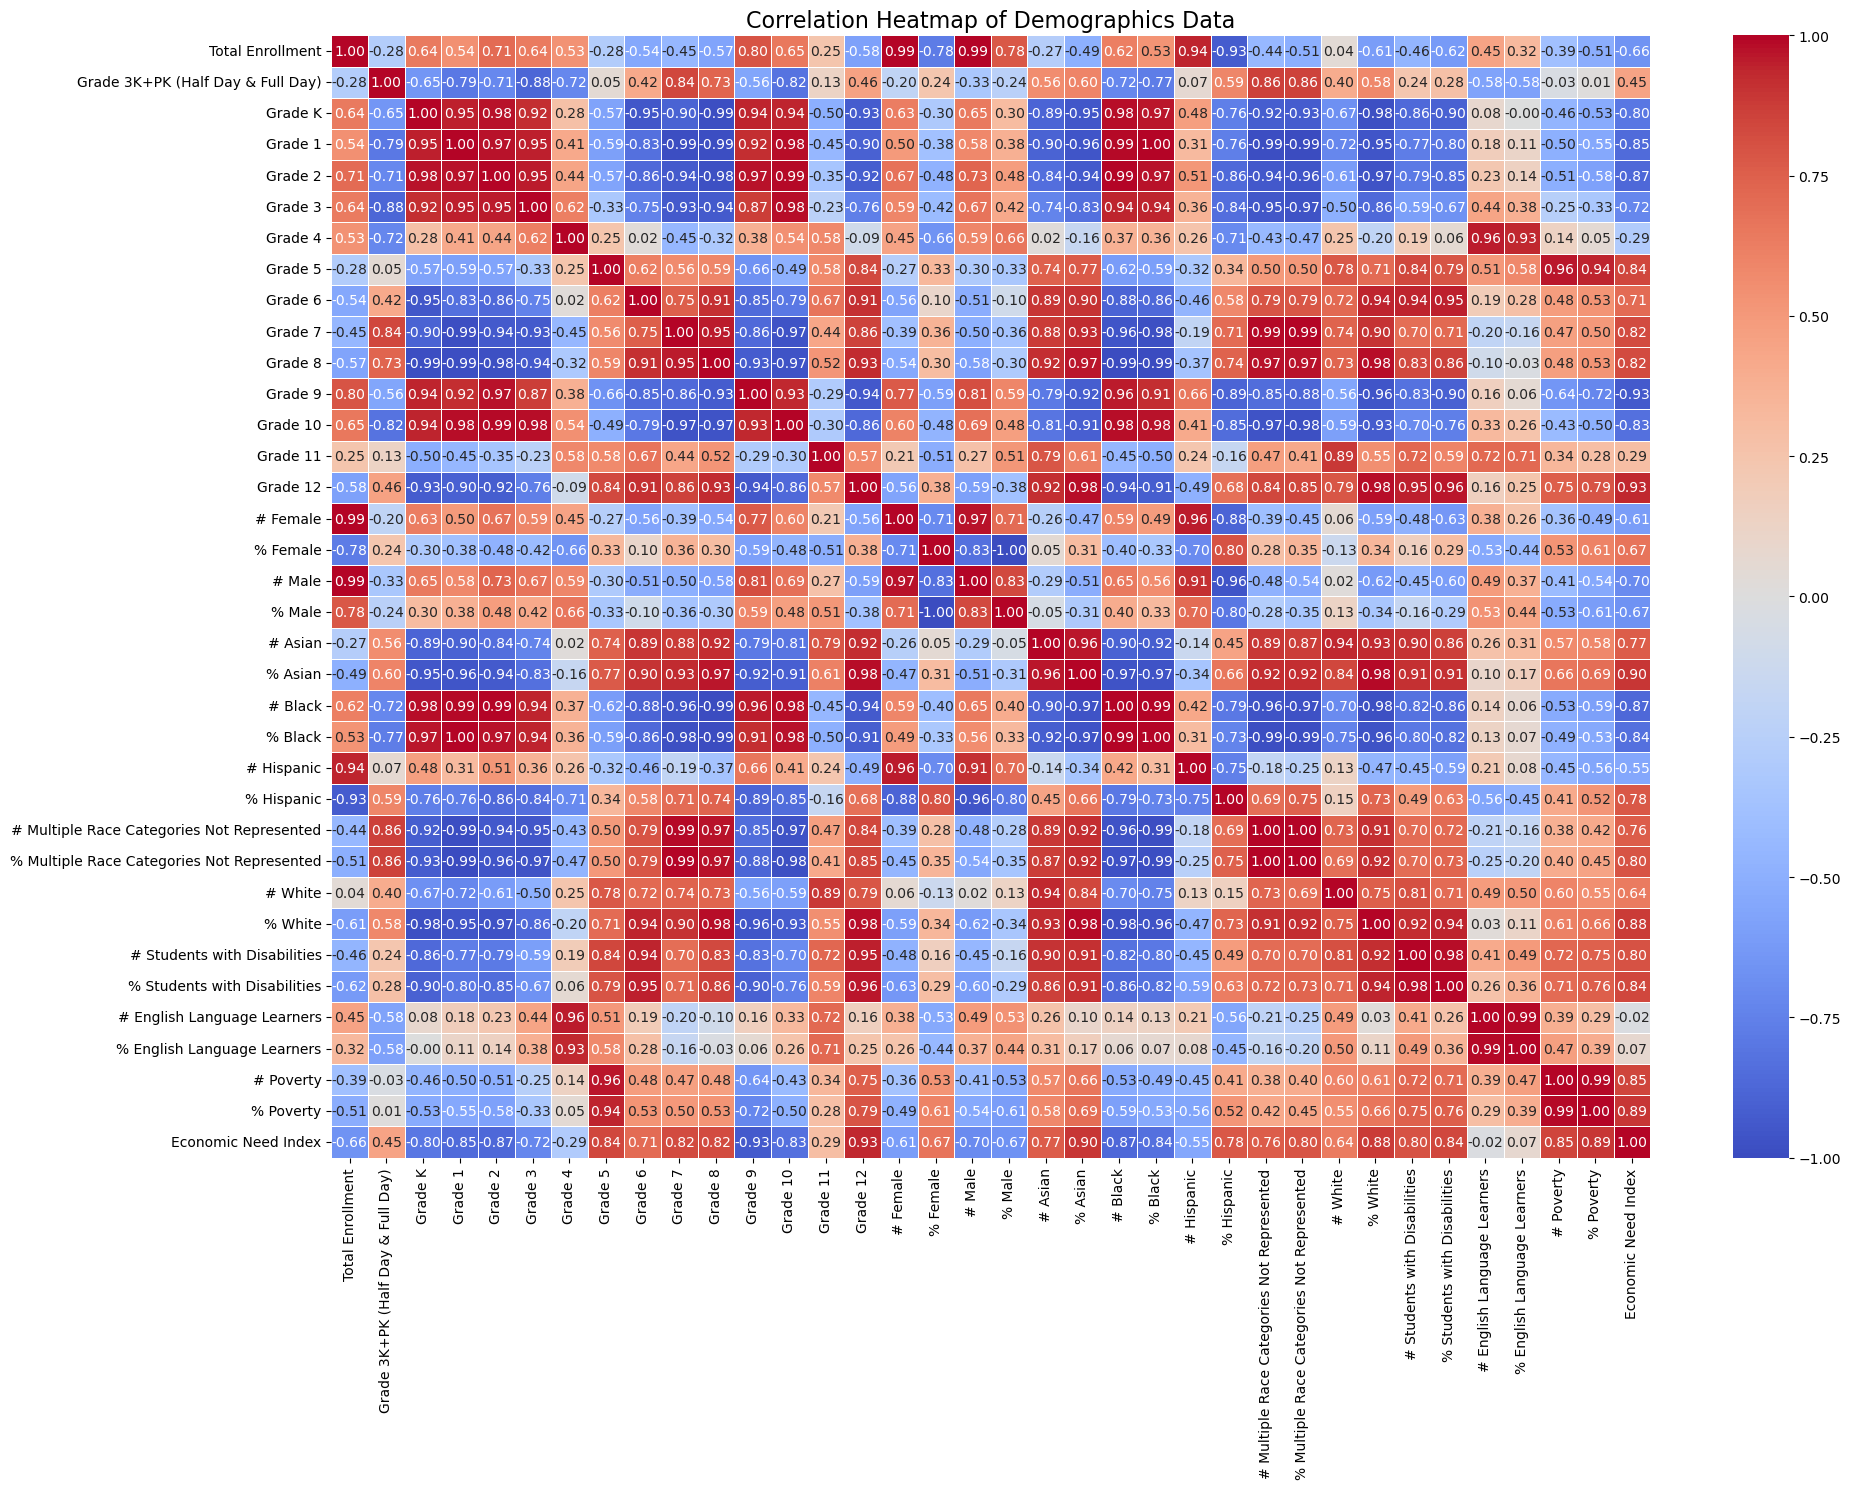

In [81]:
demographics_number = demographics.drop(columns=['Year'])
# Calculate the Correlation Matrix
correlation_matrix = demographics_number.corr()
# Generate the Heatmap
# Set up the matplotlib figure to control the size of the plot.
plt.figure(figsize=(20, 15))
# Create the heatmap using seaborn.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
# Add a title to the plot for clarity.
plt.title('Correlation Heatmap of Demographics Data', fontsize=16)
# Ensure the plot layout is tight.
plt.tight_layout()
# Display the plot.
plt.show()

Might look at over time trends

**Graduation**

In [82]:
graduation.head()

,Report Category,Geographic Subdivision,School Name,Category,Cohort Year,Cohort,# Total Cohort,# Grads,% Grads,# Total Regents,...,% Local of Cohort,% Local of Grads,# Still Enrolled,% Still Enrolled,# Dropout,% Dropout,# SACC (IEP Diploma),% SACC (IEP Diploma) of Cohort,# TASC (GED),% TASC (GED) of Cohort
0,Citywide,Citywide,NaN,All Students,2019,4 year August,69893,58503,83.7,58295,...,0.3,0.4,6773,9.7,3748,5.4,260,0.4,569,0.8
1,Citywide,Citywide,NaN,All Students,2018,4 year August,70912,59374,83.7,59110,...,0.4,0.4,6808,9.6,3831,5.4,322,0.5,547,0.8
2,Citywide,Citywide,NaN,All Students,2017,4 year August,72663,60055,82.6,59683,...,0.5,0.6,8225,11.3,3545,4.9,227,0.3,566,0.8
3,Citywide,Citywide,NaN,All Students,2016,4 year August,73565,58704,79.8,57734,...,1.3,1.7,9385,12.8,4338,5.9,269,0.4,852,1.2
4,Citywide,Citywide,NaN,All Students,2015,4 year August,73772,57035,77.3,51848,...,7,9.1,9979,13.5,5745,7.8,317,0.4,692,0.9


Most likely will remove Report Category and Geographic Subdivision since it just says citywide. SchoolName has missing values so most likely will remove as well. Need to take a look at Category. May give a better title. Will change some datatypes like Grad %. Need to figure out what to do with surpressed values. 

In [83]:
graduation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130 entries, 0 to 1129
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Report Category                       1130 non-null   object 
 1   Geographic Subdivision                1130 non-null   object 
 2   School Name                           0 non-null      float64
 3   Category                              1130 non-null   object 
 4   Cohort Year                           1130 non-null   int64  
 5   Cohort                                1130 non-null   object 
 6   # Total Cohort                        1130 non-null   int64  
 7   # Grads                               1130 non-null   object 
 8   % Grads                               1130 non-null   object 
 9   # Total Regents                       1130 non-null   object 
 10  % Total Regents of Cohort             1130 non-null   object 
 11  % Total Regents o

In [84]:
graduation.describe()

,School Name,Cohort Year,# Total Cohort
count,0.0,1130.000000,1130.000000
mean,NaN,2015.183186,18619.454867
std,NaN,2.148409,20351.068315
min,NaN,2012.000000,1.000000
25%,NaN,2013.000000,5078.250000
50%,NaN,2015.000000,10498.500000
75%,NaN,2017.000000,28566.750000
max,NaN,2019.000000,74948.000000


Average cohort year is 2015

In [85]:
graduation.isnull().sum()

Report Category                            0
Geographic Subdivision                     0
School Name                             1130
Category                                   0
Cohort Year                                0
Cohort                                     0
# Total Cohort                             0
# Grads                                    0
% Grads                                    0
# Total Regents                            0
% Total Regents of Cohort                  0
% Total Regents of Grads                   0
# Advanced Regents                         0
% Advanced Regents of Cohort               0
% Advanced Regents of Grads                0
# Regents without Advanced                 0
% Regents without Advanced of Cohort       0
% Regents without Advanced of Grads        0
# Local                                    0
% Local of Cohort                          0
% Local of Grads                           0
# Still Enrolled                           0
% Still En

**Transformations Summary**

For the attendance dataset, I completed the following transformations; I dropped the category column to reduce redudancy. I dropped suppressed data to further support the Family Educational Rights and Privacy Act (FERPA) and be able to analyze the numerical columns. 